In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb

np.random.seed(73468)
label = "rating_label"
random_state_const = 1067


In [3]:
train = pd.read_csv(f"train_final_normalised.csv")
test = pd.read_csv(f"test_final_normalised.csv")

train_y = train.pop(label)
train_X = train
test_y = test.pop(label)
test_X = test

In [4]:
from sklearn import metrics

def report(a, b):
    reports = [
        metrics.accuracy_score(a, b), 
        metrics.precision_score(a, b, average="macro"),
        metrics.recall_score(a, b, average="macro"),
        metrics.f1_score(a, b, average="macro")
    ]
    return reports

In [5]:
xgb_model = xgb.XGBClassifier(objective="multi:logisitic", random_state=42)
dii = {3.0: 0, 4.0: 1, 5.0: 2}
train_y_fixed = train_y.apply(lambda x: dii[x])
xgb_model.fit(train_X, train_y_fixed)
y_pred = xgb_model.predict(test_X)

In [7]:
test_y_fixed = test_y.apply(lambda x: dii[x])
report(test_y_fixed, y_pred)

[0.7069152395404292,
 0.7089639115916078,
 0.3762236298899437,
 0.3699682115401943]

In [9]:
pd.Series(y_pred).value_counts()

1    4303
0     301
2       9
dtype: int64

In [10]:
test_y_fixed.value_counts()

1    3242
0    1173
2     198
Name: rating_label, dtype: int64

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

dii = {3.0: 0, 4.0: 1, 5.0: 2}
train_y_fixed = train_y.apply(lambda x: dii[x])

xgb_model = xgb.XGBClassifier(objective="multi:logisitic", random_state=42)
possible_hyperparams = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [0, 2, 4, 6, 8, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 10, 20, 30, 40, 50, 60],
    'reg_lambda': [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

rand_search = RandomizedSearchCV(xgb_model, possible_hyperparams, scoring='f1_macro', n_iter=10)
rand_search.fit(train_X, train_y_fixed)
results = pd.DataFrame(rand_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.669653,0.237747,0.013641,0.000548,0.6,60,0,10,0.1,0.9,"{'reg_lambda': 0.6, 'reg_alpha': 60, 'min_chil...",0.306747,0.313679,0.310647,0.310058,0.321996,0.312625,0.005177,9
1,18.259664,0.200913,0.016427,0.000522,0.6,30,8,9,0,1.0,"{'reg_lambda': 0.6, 'reg_alpha': 30, 'min_chil...",0.343270,0.361495,0.345095,0.362773,0.364522,0.355431,0.009253,2
2,9.861414,0.580041,0.014241,0.000398,0.6,50,8,6,0.3,1.0,"{'reg_lambda': 0.6, 'reg_alpha': 50, 'min_chil...",0.314097,0.320060,0.318211,0.306038,0.340343,0.319750,0.011371,7
3,10.659489,0.421642,0.013073,0.000584,0,60,6,10,0.5,1.0,"{'reg_lambda': 0, 'reg_alpha': 60, 'min_child_...",0.308748,0.321134,0.307151,0.303352,0.337407,0.315559,0.012446,8
4,7.352123,0.237541,0.014163,0.000316,0.6,60,4,6,0.5,0.8,"{'reg_lambda': 0.6, 'reg_alpha': 60, 'min_chil...",0.308360,0.300331,0.295320,0.288641,0.300878,0.298706,0.006532,10
5,12.311726,0.707690,0.015348,0.000319,1.0,40,6,8,0.3,0.9,"{'reg_lambda': 1.0, 'reg_alpha': 40, 'min_chil...",0.329837,0.331763,0.340048,0.330994,0.353744,0.337277,0.008990,4
6,8.369658,0.194607,0.016958,0.000701,0.2,40,10,8,0.4,0.5,"{'reg_lambda': 0.2, 'reg_alpha': 40, 'min_chil...",0.321173,0.323703,0.321923,0.325994,0.341813,0.326921,0.007629,6
7,12.694592,0.706593,0.021423,0.001784,0.8,20,10,10,0.2,0.5,"{'reg_lambda': 0.8, 'reg_alpha': 20, 'min_chil...",0.344246,0.343866,0.354044,0.369254,0.364601,0.355202,0.010351,3
8,18.282402,0.384168,0.020670,0.004265,0.4,20,10,8,0,0.9,"{'reg_lambda': 0.4, 'reg_alpha': 20, 'min_chil...",0.348761,0.360415,0.353365,0.356735,0.375345,0.358924,0.009065,1
9,11.065305,1.105916,0.016355,0.001135,0.4,40,2,8,0.2,0.7,"{'reg_lambda': 0.4, 'reg_alpha': 40, 'min_chil...",0.326601,0.325704,0.328591,0.328391,0.357219,0.333301,0.012008,5


In [52]:
rand_search.best_params_

{'reg_lambda': 0.4,
 'reg_alpha': 20,
 'min_child_weight': 10,
 'max_depth': 8,
 'gamma': 0,
 'colsample_bytree': 0.9}

In [53]:
xgb_final_model = xgb.XGBClassifier(objective="multi:logisitic", random_state=42, reg_lambda=0.4, reg_alpha=20, min_child_weight=10, max_depth=8, gamma=0, colsample_bytree=0.9)
xgb_final_model.fit(train_X, train_y_fixed)
y_pred = xgb_final_model.predict(test_X)

dii = {0: 3, 1: 4, 2: 5}
y_pred_fixed = pd.Series(y_pred).apply(lambda x: dii[x])

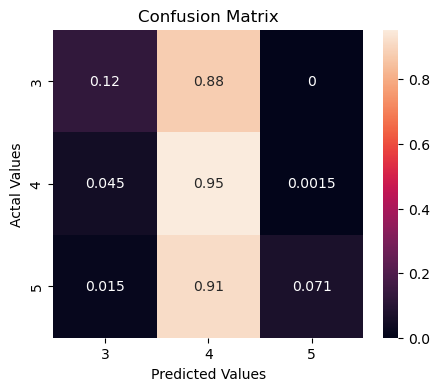

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(test_y, y_pred_fixed)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['3','4','5'], 
                     columns = ['3','4','5'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [44]:
test_y

0       3.0
1       3.0
2       4.0
3       4.0
4       4.0
       ... 
4608    4.0
4609    4.0
4610    4.0
4611    4.0
4612    4.0
Name: rating_label, Length: 4613, dtype: float64

In [41]:
len(y_pred)

4613